<a href="https://colab.research.google.com/github/Locojuan9/se-ales_y_sistemas/blob/main/3_SerieyTransformadaFourier/Parcial_2_SyS_Juan_Alejandro_Villodres_Perdomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1 - Simulación

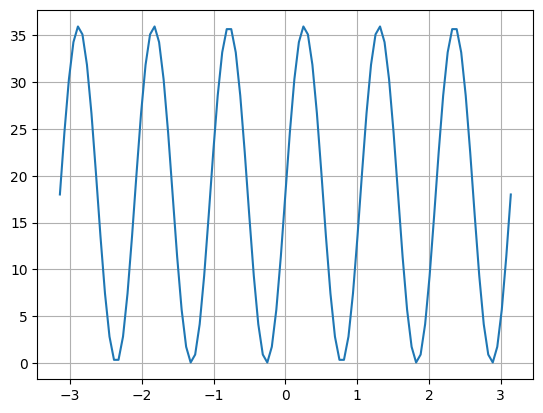

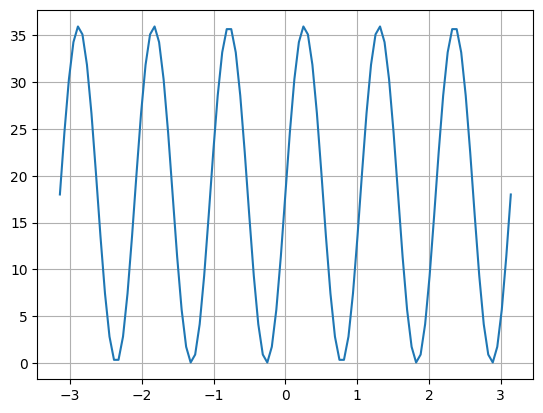

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider
import warnings

T = 2*np.pi
Fo = 1/T
Fs = 100 * Fo
tv = np.arange(-T/2, T/2, 1/Fs)
Nm = len(tv)

x_t = abs(6*np.sin(3*tv + np.pi/4))**2
plt.plot(tv, x_t)
plt.grid(True)
plt.show()

x_t = 18-18*np.cos(6*tv + np.pi/2)
plt.plot(tv, x_t)
plt.grid(True)
plt.show()

In [37]:
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#figura y axes animaciónx
fig, ax = plt.subplots(1, 1,figsize=(6,3))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax.clear()
    ax.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    ax.set_xlabel("t[s]",fontsize = 12)
    ax.set_ylabel("$\phi_n$(t)",fontsize = 12)
    ax.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    ax.plot(tv,x_t,'r',linewidth=4,label='$x(t)$')
    ax.set_title(f'Bases armónico n = {n}')
    ax.legend(loc='lower left')
    plt.show()
    #desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(-N,N,1), blit=False)
rc('animation', html='jshtml')

In [39]:
anim

In [43]:
#calcular espectro -> cambiar según la señal estudiada
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = np.zeros(2*N+1,dtype=np.complex_)
Cn[N] = 18 # nivel dc C_0
Cn[N+6] = Cn[N-6] = 0-9j

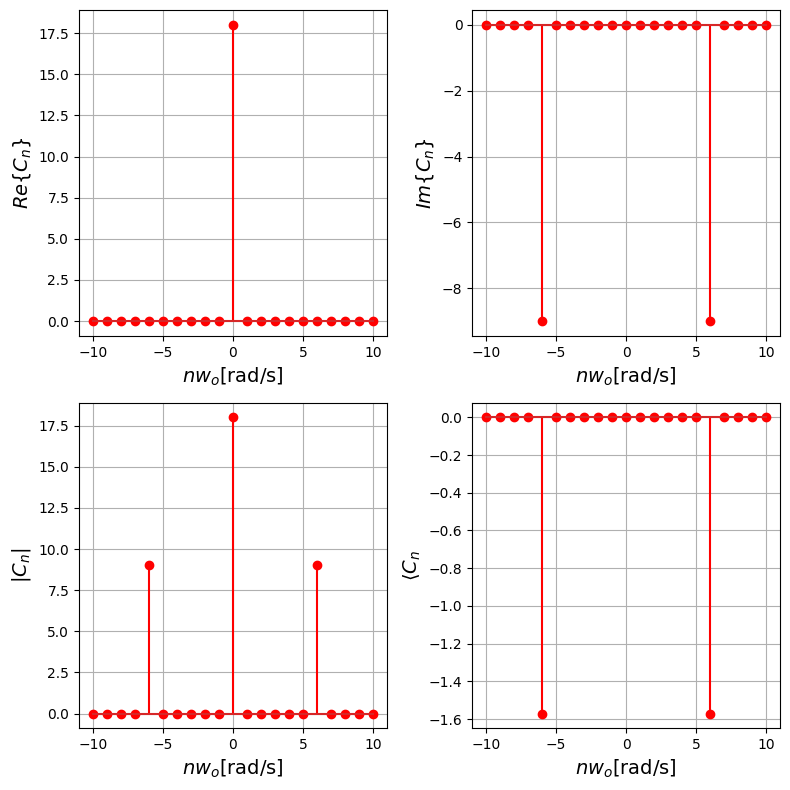

In [44]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [45]:
Px = 486 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x_t,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=10, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

In [ ]:
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind]) # dot calcula el producto entre vectores
    #error en t
    et = x_t - xe

    ax[1,1].plot(tv,x_t,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

In [48]:
warnings.filterwarnings('ignore')
anim

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Punto 2 - Modulación AM

* Se instala la librería para descargar vídeos de YouTube y reproducir audios en Google Colab

In [ ]:
!python3 -m pip install --force-reinstall -U https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

In [ ]:
!pip install soundfile

* Se importan las librerías necesarias

In [54]:
import yt_dlp as youtube_dl
import soundfile as sf
import subprocess
from IPython.display import Audio
import os

* Se crea una función que permite descargar vídeos de YouTube y almacenarlos en formato .mp3

In [82]:
def download_ytvid_as_mp3(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

* Se llama la función para descargar el vídeo y posteriormente se convierte a formato .wav

In [ ]:
name_ = 'audio'

try:
    os.remove(f'{name_}.wav')
    print('Archivo removido con éxito\n')
except:
    print('El archivo ya ha sido removido\n')

# Link
x_input = 'https://www.youtube.com/watch?v=tG35R8F2j8k'

# descargar mp3 desde youtube
download_ytvid_as_mp3(x_input, name_)
# convertir a .wav
subprocess.call(['ffmpeg', '-y', '-i', name_+'.mp3', name_+'.wav'])

# Eliminar archivos innecesarios
try:
    os.remove(f'{name_}.mp3')
    print('Archivo removido con éxito\n')
except:
    print('El archivo ya ha sido removido\n')

* Se extraen los datos necesarios de la canción (Frecuencia de la canción y contenido en audio)

In [84]:
nout = name_ + '.wav'
xa, fs = sf.read(nout)
print('Frecuencia de muestreo: %.2f[Hz]\naudio: "%s"' % (fs, nout))

Frecuencia de muestreo: 48000.00[Hz]
audio: "audio.wav"


* Se crea la señal mensaje guardando solo los segundos 20 a 25 de la canción

In [85]:
xpro = xa.copy() # Se crea una copia de la canción para trabajar sobre ella y no modificar la original

ti = 20 # Tiempo inicial
tf = 25 # Tiempo final

m = xpro[int(ti*fs):int((tf*fs)), 0] # Señal mensaje (m) en audio mono desde el segundo ti a tf

* Se reproduce la señal mensaje creada

In [86]:
Audio(m, rate=fs)

* Se plotea la señal mensaje en función del tiempo

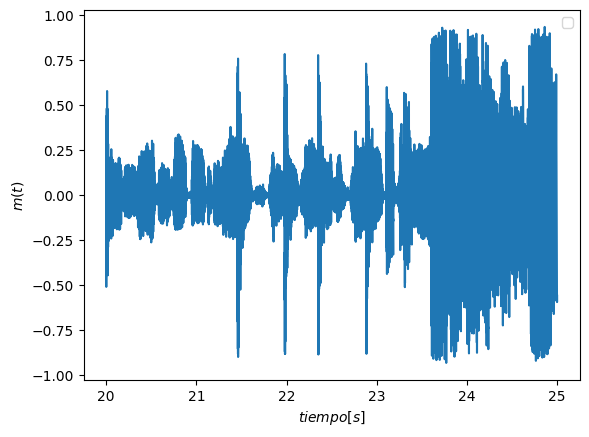

In [87]:
tt = np.arange(ti, tf, 1/fs) # Vector de tiempo

plt.plot(tt, m) # Señal mensaje (m) vs Tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

* Se calcula la transformada de Fourier de la señal mensaje con el fin de obtener su vector de frecuencias

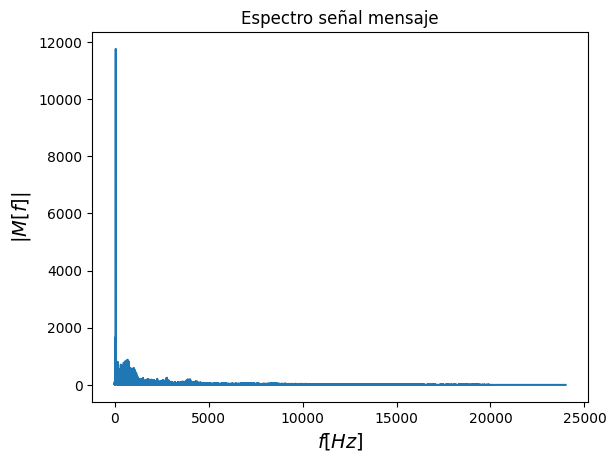

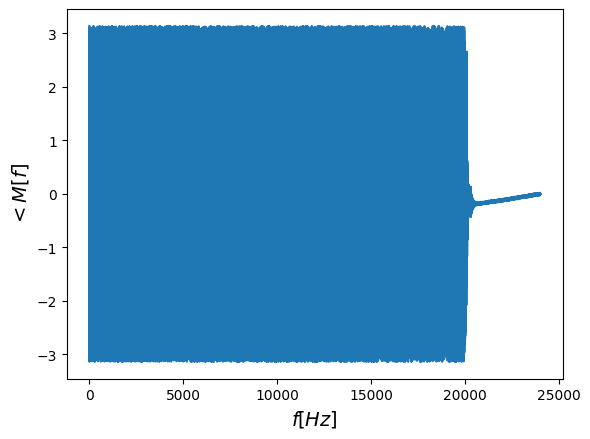

In [89]:
Mw = np.fft.rfft(m) # Se calcula la transformada rápida (real) de Fourier a la señal mensaje (m)
vf = np.fft.rfftfreq(m.shape[0], 1/fs) # Se crea el vector de frecuencias de la señal mensaje (m)

plt.plot(vf, abs(Mw)) # Magnitud de la señal mensaje vs Frecuencia
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw)) # Fase de la señal mensaje vs Frecuencia
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

* Se crea la señal portadora

In [91]:
Fc = 15000 # Frecuencia de la señal portadora (c)
Im = 1 # Índice de modulación
Ac = max(abs(m))/Im # Amplitud portadora

c = Ac*np.cos(2*np.pi*Fc*tt) # Señal portadora (c)

* Se reproduce la señal portadora

In [71]:
Audio(c,rate=fs)

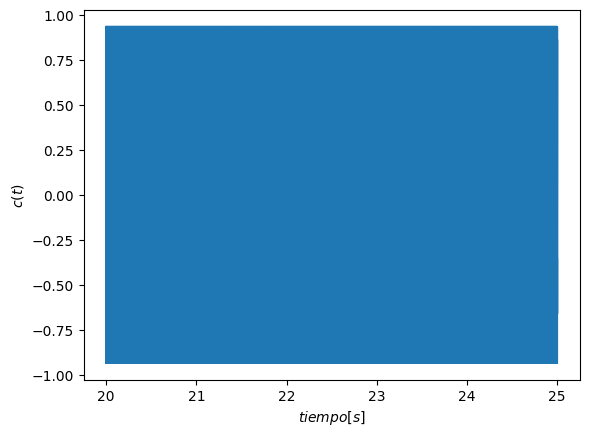

In [72]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

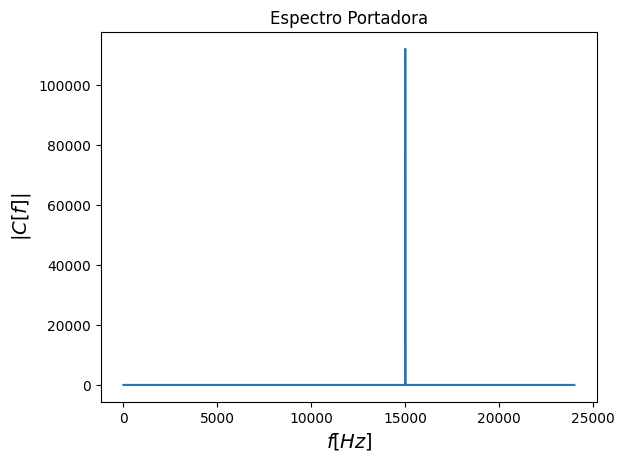

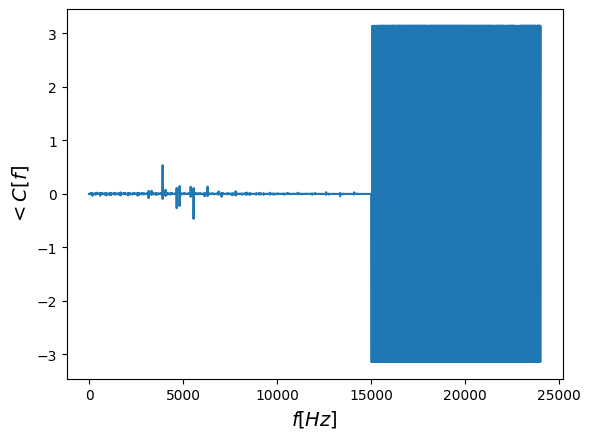

In [73]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [74]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [75]:
#repoducir modulada
Audio(y,rate=fs)

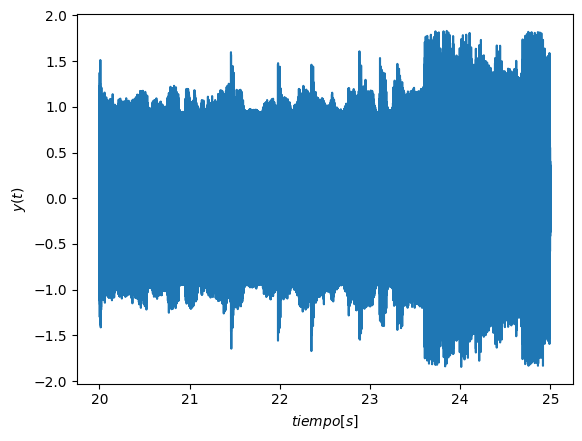

In [76]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

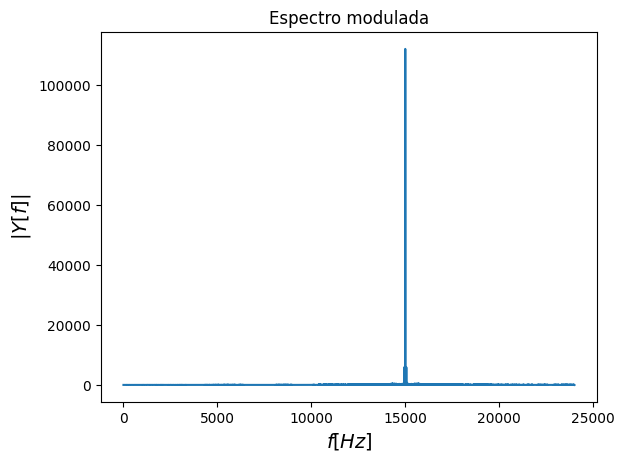

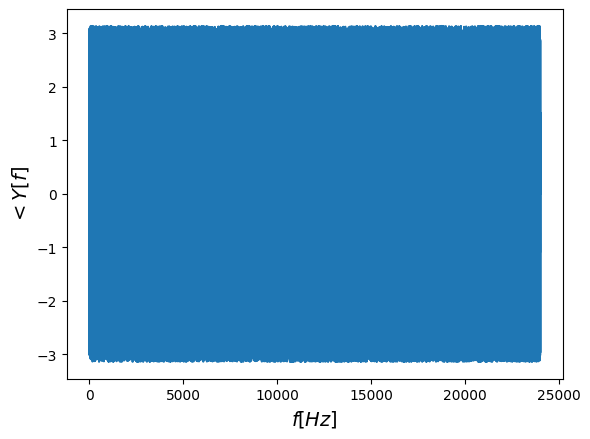

In [77]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()